In [1]:
%matplotlib inline
import numpy as np
import config

import plotting_helpers as plots
import utility_functions as utils
import csd_profile as CSD
from KCSD import KCSD1D

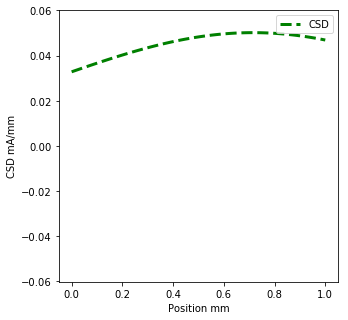

In [2]:
# Lets say we create a random CSD source
csd_profile = CSD.gauss_1d_mono #Type of the CSD Source
config.dim = 1
csd_at, true_csd = utils.generate_csd(csd_profile)
plots.show_csd_1D(csd_at, true_csd)

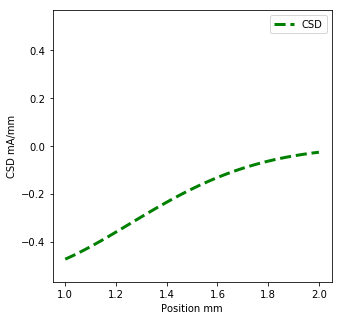

In [4]:
csd_at_b =  np.mgrid[1:2:100j]
csd_at_b, true_csd_b = utils.generate_csd(csd_profile, csd_at_b, seed=12)
plots.show_csd_1D(csd_at_b, true_csd_b)

In [ ]:
 #Lets add some electrodes which span the CSD space                                                                                                                                                                                                    
num_ele, ele_pos = utils.generate_electrodes(dim=1)
plots.show_csd_1D(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

In [ ]:
# Lets emulate the case when some of the electrodes are broken / used for stimulation
ele_seed = np.random.RandomState(13)
ele_fail = ele_seed.choice(num_ele, 3, replace=False)

ele_pos = np.delete(ele_pos, ele_fail, axis=0)
plots.show_csd_1D(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

In [ ]:
# Lets compute the potential recorded by these electrodes due to the CSD
r = 10.
sigma = 1.
pots = utils.calculate_potential_1D(csd_at, true_csd, ele_pos, r, sigma)
print(pots.shape)
plots.show_pot_1D(ele_pos, pots)
#Lets do KCSD!
k = KCSD1D(ele_pos.reshape((30,1)), pots.reshape((30,1)), sigma=1., h=10., n_src_init=300) 
est_csd = k.values()
est_pos = k.estm_x
plots.show_csd_1D(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

In [ ]:
k.cross_validate(Rs=np.arange(0.2,0.4,0.01), lambdas=np.logspace(15,-25, 35))
est_csd = k.values()
est_pos = k.estm_x
plots.show_csd_1D(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

In [ ]:
#RMS of estimation - gives estimate of how good the reconstruction was
chr_x, test_csd = utils.generate_csd_1D(csd_profile, csd_seed,
                                        start_x=x_lims[0], end_x=x_lims[1], 
                                        res_x=int((x_lims[1]-x_lims[0])/gdX))
rms = np.linalg.norm(abs(test_csd - est_csd[:,0]))
rms /= np.linalg.norm(test_csd)
